 # **Data Visualization Final Project**  

### Project Members: 

- Arsalan Khan : 210862640
- Zaid Saiyed  : 169015983
- Aliha Ali    : 210184090

### Dataset

The dataset we have decided to focus on is **Ontario COVID-19 testing percent positive by age group** which has a Data range from _May 1, 2020 - March 28, 2024_

### Formulating a Meaningful Question

Given the dataset's structure, a meaningful question we have chosen is: **"How did the COVID-19 test positivity rate vary among different age groups over time in Ontario?"**

Link: 

This question allows us to:

- Analyze trends over time, highlighting periods of high transmission.

- Compare how different age groups were affected throughout the pandemic.

- Understand the dynamics of the pandemic across the population of Ontario.

### Motivation 

In our pursuit of understanding the impact of the COVID-19 pandemic across different demographics, we are particularly drawn to the question of which age group was most significantly affected in Ontario over the course of the pandemic. This inquiry is fueled by a prevailing narrative seen in numerous news articles, suggesting that COVID-19 primarily affected older populations. Our aim is go into the dataset, exploring beyond surface-level assumptions to validate the accuracy of these claims. Through our analysis, we seek not only to identify the age group most affected by COVID-19 but also to contribute to a nuanced understanding of the pandemic's reach across age demographics in Ontario. This endeavor is not just about challenging or confirming existing narratives but about enriching our knowledge with data-driven insights.



# Important: Please ensure you have all the libraries listed below to ensure all the graphs run efficiently. 

- Python pandas    _pip install pandas_ 
- Matplotlib.pyplot _pip install matplot.lib.pyplot_
- Numpy _pip install numpy_
- Seaborn _pip install seaborn_
- Plotly.express _pip install plotly_
- Plotly.io _pip install plotly.io_

### Here is our dataset:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

df = pd.read_csv('percent_positive_by_agegrp.csv')

# Display the first few rows of the dataframe
df.head(7513), 


(            DATE age_category  percent_positive_7d_avg
 0     2020-05-01        0to13                   0.0346
 1     2020-05-02        0to13                   0.0355
 2     2020-05-03        0to13                   0.0365
 3     2020-05-04        0to13                   0.0364
 4     2020-05-05        0to13                   0.0354
 ...          ...          ...                      ...
 7130  2024-03-23          65+                   0.0615
 7131  2024-03-24          65+                   0.0601
 7132  2024-03-25          65+                   0.0593
 7133  2024-03-26          65+                   0.0590
 7134  2024-03-27          65+                   0.0592
 
 [7135 rows x 3 columns],)

### Data Preprocessing Instruction

The dataset contains information on the percentage of COVID-19 tests that were positive, segmented by age groups, across different dates in Ontario. This data can help identify which age groups were most affected during different phases of the pandemic.

Before we start the creation of any visualization, we need to:

- Convert the DATE column to datetime format for easier time-series analysis.
- Ensure data quality by checking for any missing or inconsistent data points.

In [16]:
# Convert the DATE column to datetime and extract the date part
df['DATE'] = pd.to_datetime(df['DATE']).dt.date

# Check for missing values and display the result
missing_data_check = df.isnull().sum()
missing_data_check


DATE                       0
age_category               0
percent_positive_7d_avg    0
dtype: int64

In [17]:
# Prepare the data for visualization by ensuring it's sorted by date
df_sorted = df.sort_values(by='DATE')

# Display the first few rows of the sorted DataFrame
df_sorted.head()


,DATE,age_category,percent_positive_7d_avg
0,2020-05-01,0to13,0.0346
1427,2020-05-01,14to17,0.0337
2854,2020-05-01,18to24,0.0435
4281,2020-05-01,25to64,0.0504
5708,2020-05-01,65+,0.0427


In [18]:
# Display DataFrame information
df_sorted.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7135 entries, 0 to 7134
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     7135 non-null   object 
 1   age_category             7135 non-null   object 
 2   percent_positive_7d_avg  7135 non-null   float64
dtypes: float64(1), object(2)
memory usage: 223.0+ KB


In [19]:
# Display descriptive statistics of the DataFrame
df_sorted.describe()


,percent_positive_7d_avg
count,7135.000000
mean,0.079304
std,0.064871
min,0.000000
25%,0.027100
50%,0.061300
75%,0.117900
max,0.405300


## **Visualization 1: Line Plot**

For our first visualization we decided to begin with a Line Plot. This will help us visualize how the positivity rate has changed over time within each age category.

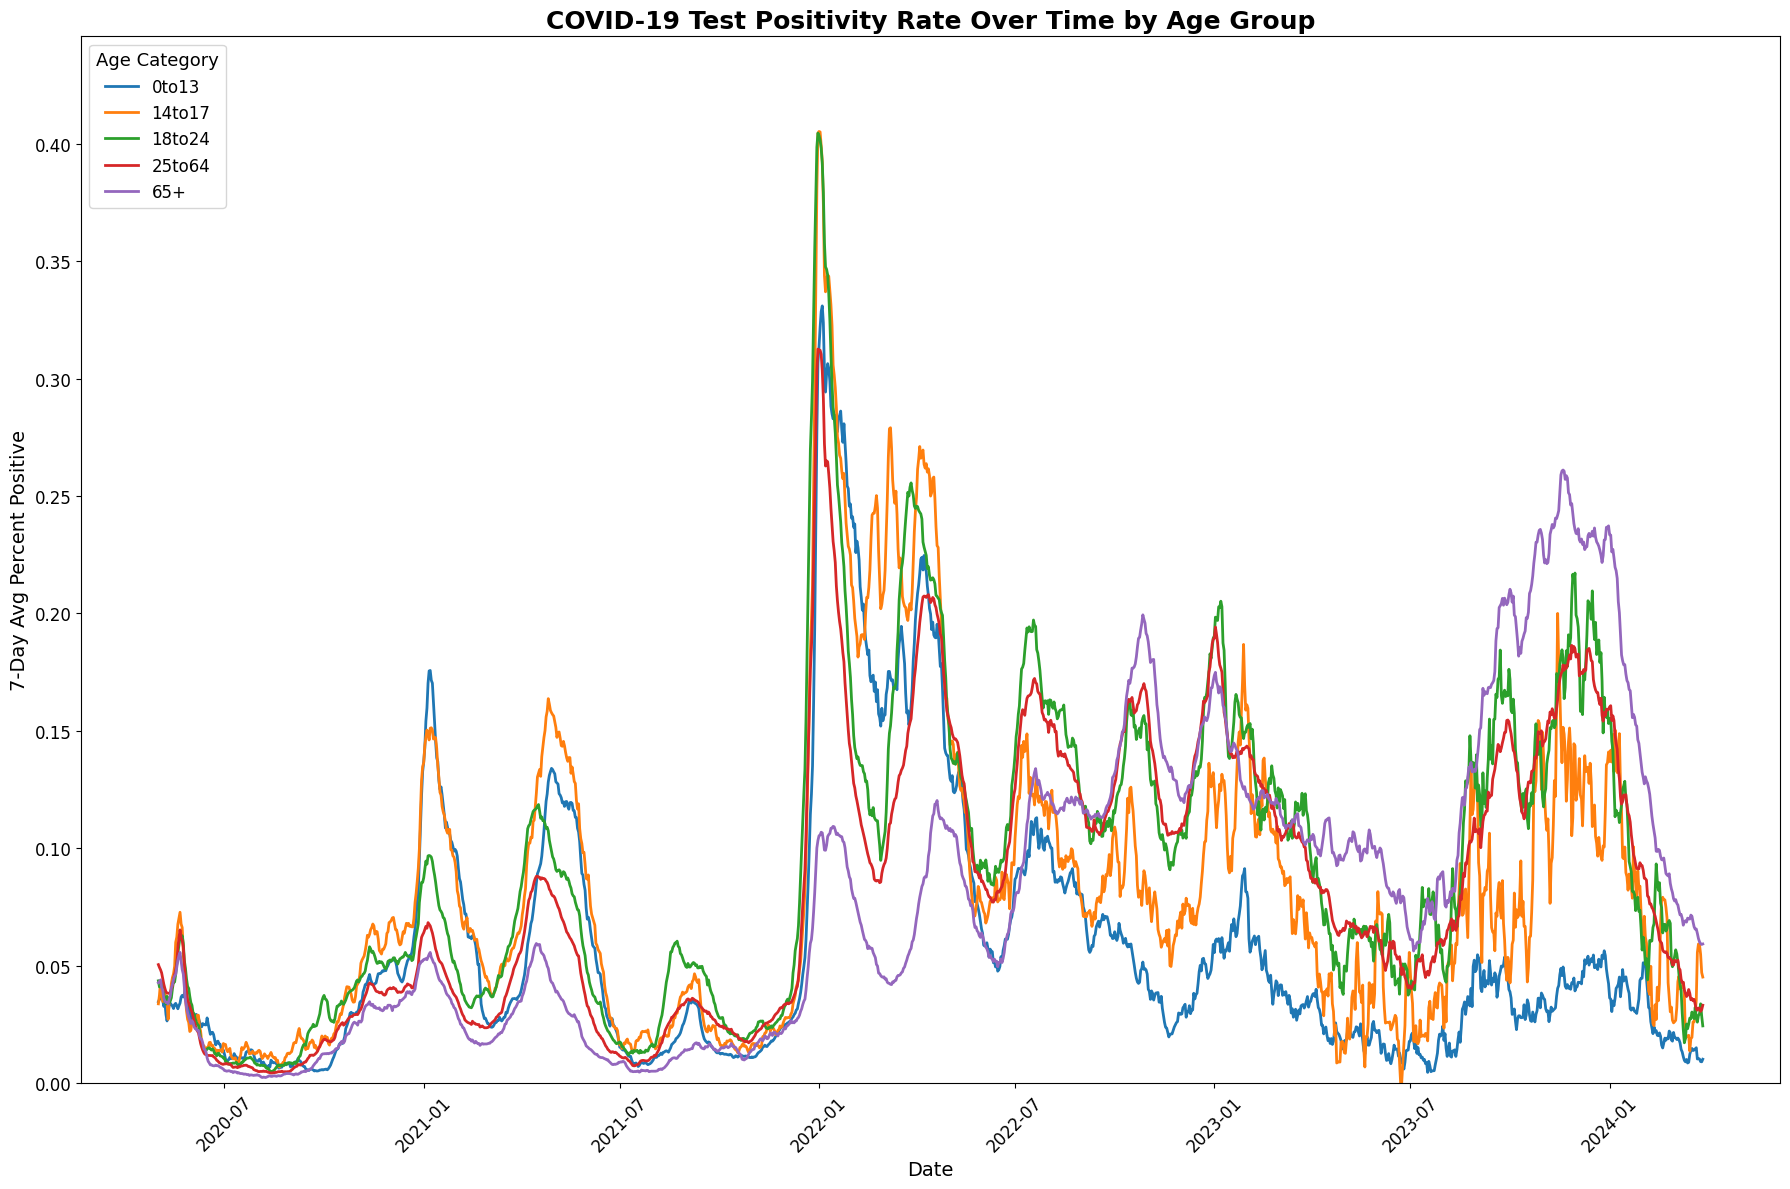

In [20]:
plt.figure(figsize=(18, 12))

# Determine the range of 'percent_positive_7d_avg' to adjust y-axis limits
min_percent_positive = df_sorted['percent_positive_7d_avg'].min()
max_percent_positive = df_sorted['percent_positive_7d_avg'].max()

# Plot each age category with a unique color
for i, age_category in enumerate(df_sorted['age_category'].unique()):
    df_age = df_sorted[df_sorted['age_category'] == age_category]
    plt.plot(df_age['DATE'], df_age['percent_positive_7d_avg'], label=age_category, linewidth=2)

plt.title('COVID-19 Test Positivity Rate Over Time by Age Group', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('7-Day Avg Percent Positive', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust y-axis to be slightly wider than the min and max to ensure visibility
plt.ylim([min_percent_positive*0.8, max_percent_positive*1.1])

plt.legend(title='Age Category', fontsize=12, title_fontsize='13', loc='upper left')
plt.tight_layout()
plt.show()


## **Visualization 2: Heat Map**

For our second visualization, after viewing different variations of visualizations, we decided to go with a heatmap. A heatmap will allow us to see at a glance how positivity rates in different age groups have changed over the entire time period, highlighting any temporal patterns or anomalies.

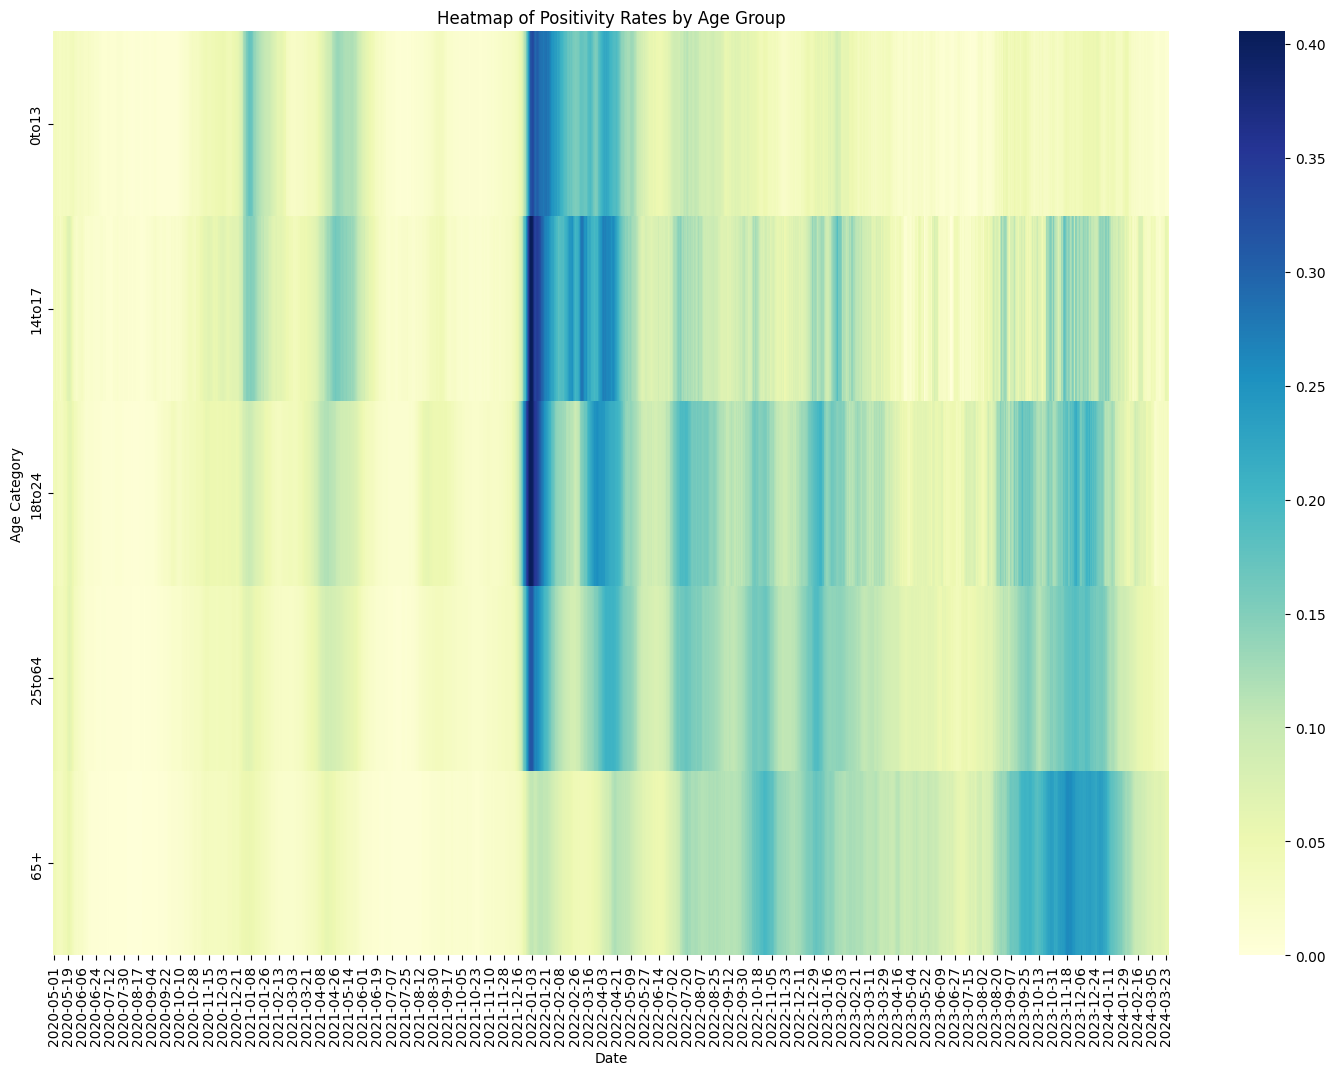

In [21]:
# Assuming df_sorted is your DataFrame
# Correcting the pivot call
heatmap_data = df_sorted.pivot(index="DATE", columns="age_category", values="percent_positive_7d_avg")

# Creating subplots
plt.figure(figsize=(18, 12))


sns.heatmap(heatmap_data.T, cmap="YlGnBu")
plt.title('Heatmap of Positivity Rates by Age Group')
plt.xlabel('Date')
plt.ylabel('Age Category')

plt.show()



## **Visualization 3: Box Plot**

For our 3th visualization, we decided it was best we use a box plot so we could compare the distributions of positivity rates across age groups. A box plot is particularly significant for our analysis as it offers a concise summary of the COVID-19 test positivity rates' distributions across different age groups, highlighting the median, quartiles, and outliers within each group, which helps in understanding the variability and identifying potential anomalies in the data.

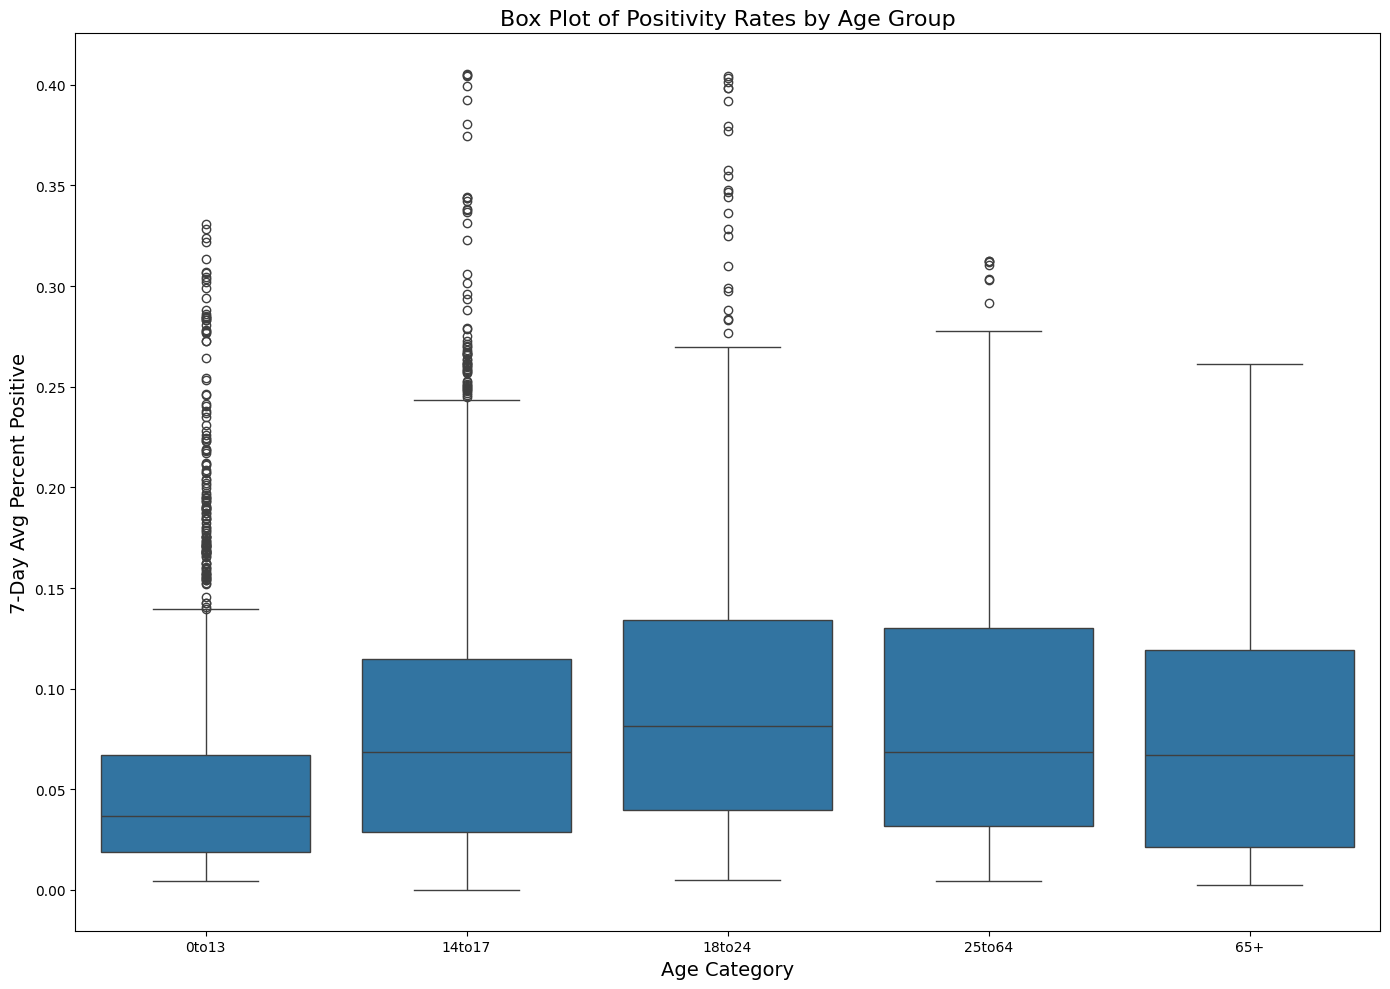

In [22]:
# Assuming df_sorted is your DataFrame

# Set the figure size
plt.figure(figsize=(14, 10))  # Increase the figure size

# Create the box plot of Positivity Rates by Age Group
sns.boxplot(x='age_category', y='percent_positive_7d_avg', data=df_sorted)
plt.title('Box Plot of Positivity Rates by Age Group', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('7-Day Avg Percent Positive', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## **Visualization 4: Bar Chart** 

For our fourth visualization, we decided to use a bar chart. A bar chart is significant in the context of our meaningful question because it succinctly summarizes and compares the average COVID-19 test positivity rates across different age groups, providing a clear visual representation of which age categories experienced higher or lower rates of positive tests throughout the pandemic in Ontario.

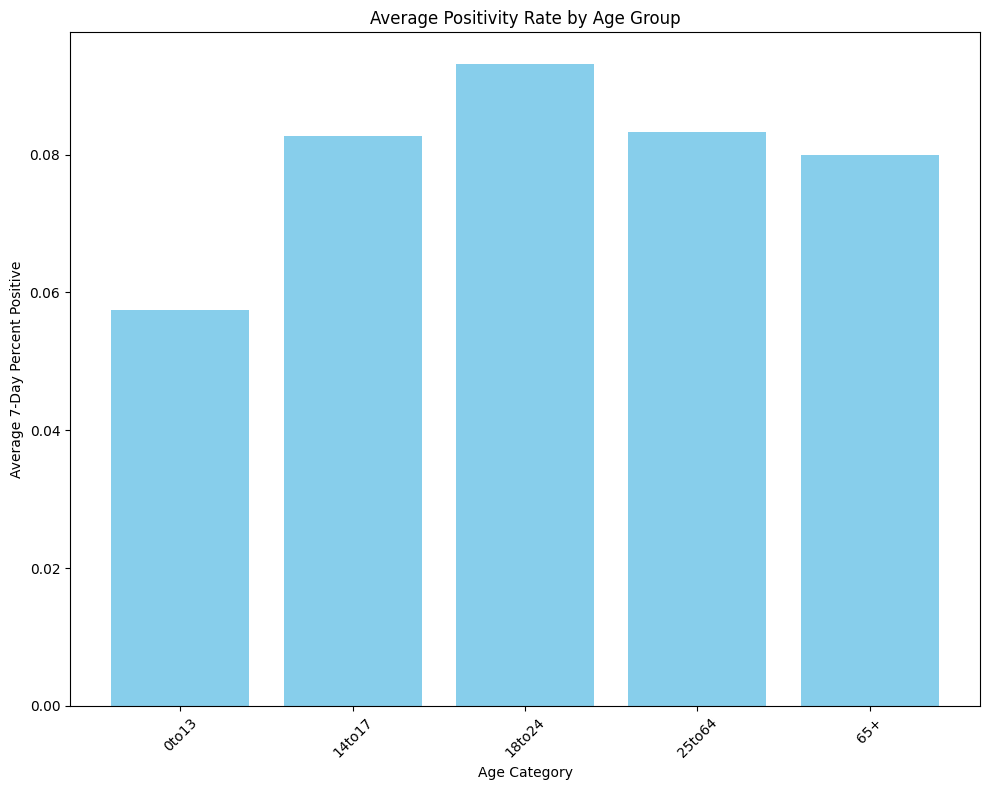

In [23]:
# Calculate the average positivity rate by age group
bar_chart_data = df_sorted.groupby('age_category')['percent_positive_7d_avg'].mean()

# Now bar_chart_data is prepared, you can plot your bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # This creates a single subplot

# Bar Chart of Average Positivity Rate by Age Group
ax.bar(bar_chart_data.index, bar_chart_data.values, color='skyblue')
ax.set_title('Average Positivity Rate by Age Group')
ax.set_xlabel('Age Category')
ax.set_ylabel('Average 7-Day Percent Positive')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## **Visualization 5: Strip Chart**

For our 5th visualization, we decided to use a stripchart. A strip chart is significant for visualizing the actual distribution of individual data points across categories, providing clear insight into the spread and density of the data, which can be especially informative when assessing the variability within each group. For our question, the strip chart is particularly significant as it allows us to observe the individual positivity rates within each age category, helping to identify specific outliers or clusters of data points that could indicate trends or anomalies not immediately apparent in aggregated data visualizations.


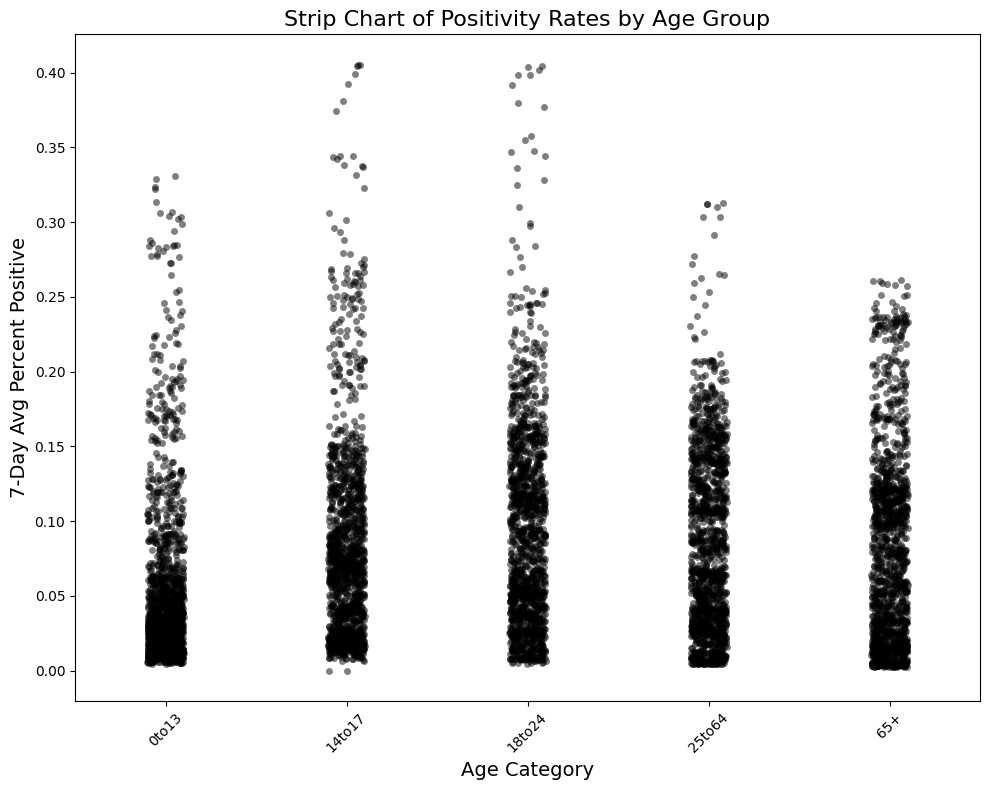

In [24]:
# Create a figure for the strip chart
plt.figure(figsize=(10, 8))

# Strip Chart for distribution of data points using Seaborn
# Adding jitter and transparency (alpha) to the points
sns.stripplot(x='age_category', y='percent_positive_7d_avg', data=df_sorted, jitter=True, alpha=0.5, color='black')
plt.title('Strip Chart of Positivity Rates by Age Group', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('7-Day Avg Percent Positive', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



## **Quantitative Analysis of COVID-19 Test Positivity Rates by Age Group**

In our exploration of COVID-19 test positivity rates in Ontario across different age groups over time, we utilize statistical measures to deepen our understanding of the pandemic's dynamics. The following quantitative analysis provides insights into the central tendencies and variability of positivity rates, supporting our visual findings.

Statistical Measures:
- **Mean**: Represents the average positivity rate, offering a central value for the data's distribution within each age group and across the entire timeframe.
- **Median**: The middle value when the positivity rates are arranged in ascending order, indicating the central tendency of the data and minimizing the impact of outliers.
- **Standard Deviation**: Measures the amount of variation or dispersion from the mean, providing insight into the spread of positivity rates within age groups.


Analysis by Age Group:



In [25]:
# Assuming 'df_sorted' is our DataFrame
statistics_df = df_sorted.groupby('age_category')['percent_positive_7d_avg'].agg(['mean', 'median', 'std']).reset_index()
statistics_df.rename(columns={'mean': 'Mean Positivity Rate', 'median': 'Median Positivity Rate', 'std': 'Standard Deviation'}, inplace=True)

# Display the DataFrame
statistics_df


,age_category,Mean Positivity Rate,Median Positivity Rate,Standard Deviation
0,0to13,0.057444,0.0369,0.059094
1,14to17,0.082641,0.0686,0.067602
2,18to24,0.093095,0.0814,0.067463
3,25to64,0.083343,0.0683,0.059562
4,65+,0.079998,0.0672,0.064774


_The table above offers a snapshot of how the positivity rates' central tendencies and variability differ among age groups._

- A higher mean and median in a specific age group suggest a greater impact of COVID-19 on those individuals, on average.
- A larger standard deviation indicates more variability in positivity rates, suggesting inconsistent spread patterns within that age group over time.

**Overall Temporal Analysis:**

We also examine these statistical measures across the entire dataset to understand broader trends over time.

In [26]:
overall_statistics = {
    'mean': df_sorted['percent_positive_7d_avg'].mean(),
    'median': df_sorted['percent_positive_7d_avg'].median(),
    'std': df_sorted['percent_positive_7d_avg'].std()
}

# Convert the overall_statistics dictionary into a DataFrame
stats_data = {
    'Statistic': ['Mean Positivity Rate', 'Median Positivity Rate', 'Standard Deviation'],
    'Value': [overall_statistics['mean'], overall_statistics['median'], overall_statistics['std']]
}
overall_stats_df = pd.DataFrame(stats_data)

# Convert values in 'Value' column to percentage format
overall_stats_df['Value'] = overall_stats_df['Value'].apply(lambda x: f"{x:.2%}")

# Display the DataFrame
print(overall_stats_df)

                Statistic  Value
0    Mean Positivity Rate  7.93%
1  Median Positivity Rate  6.13%
2      Standard Deviation  6.49%


_These temporal measures help identify the general trend of COVID-19 positivity rates in Ontario, offering a baseline to compare against individual age groups._

**Quantitative Analysis Findings:**

The quantitative analysis complements our visual findings, highlighting the differences in COVID-19 impact across age groups and over time. Understanding these statistical measures alongside our visualizations provides a comprehensive overview of the pandemic's progression in Ontario, aiding in targeted public health responses and further research. To create an effective description, we will take our quantitative data and see if we can find these numbers in the descriptive qualities of our visualizations. From our quantitative analysis, we found that the ages from 18 to 24 dealt with Covid Positivity Rates the most. To create an effective arguement, we made use of both qualitative and quantitative data to show how the specific age range from 18 to 24 were affected.

Here we provided modified view of our graphs, highlighing our discovery from our quantitative analysis, after looking at these we can begin our Qualitative Analysis. 

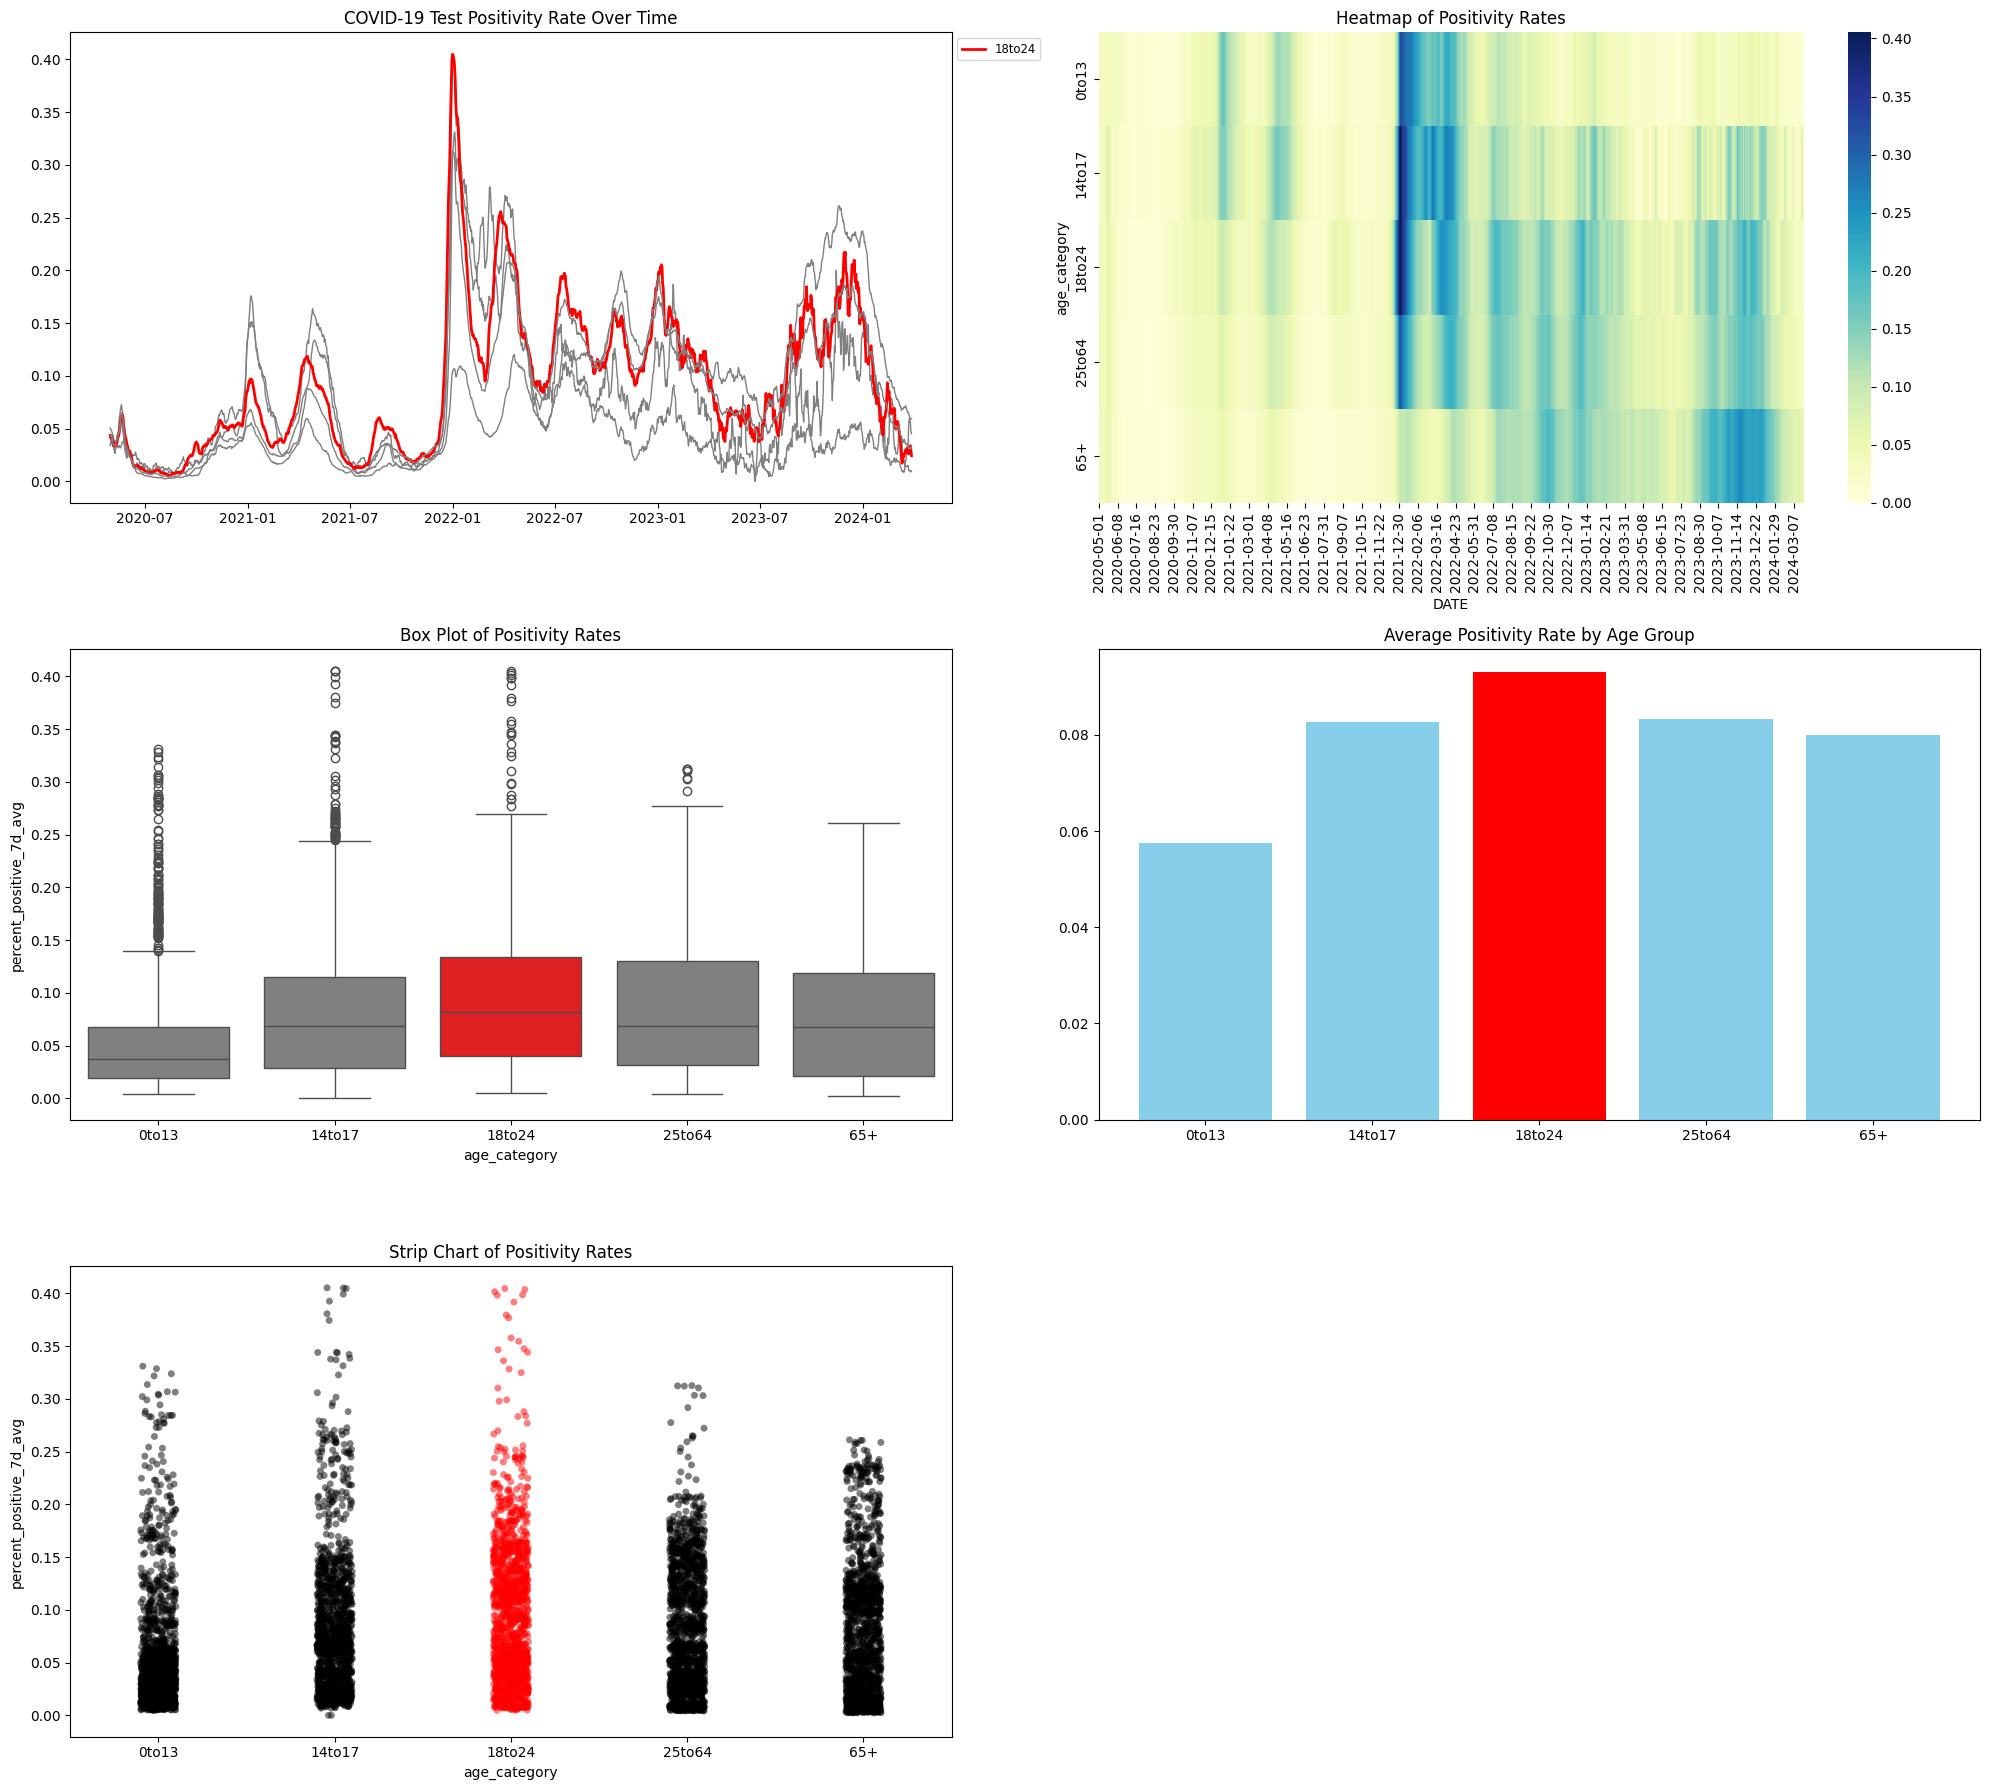

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df_sorted' is your DataFrame, and preparation steps for 'heatmap_data' and 'bar_chart_data' have been completed.
# Add a 'highlight' column to df_sorted to mark the '18to24' category distinctly
df_sorted['highlight'] = df_sorted['age_category'].apply(lambda x: '18to24' if x == '18to24' else 'Other')

# Setup the matplotlib figure and axes for a 3x2 grid
fig, axs = plt.subplots(3, 2, figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# LINE PLOT
# Highlight '18to24' age group in red, others in grey
for age_category in df_sorted['age_category'].unique():
    df_age = df_sorted[df_sorted['age_category'] == age_category]
    color = 'red' if age_category == '18to24' else 'grey'
    linewidth = 2 if age_category == '18to24' else 1
    axs[0, 0].plot(df_age['DATE'], df_age['percent_positive_7d_avg'], label=age_category if age_category == '18to24' else None, color=color, linewidth=linewidth)

axs[0, 0].set_title('COVID-19 Test Positivity Rate Over Time')
axs[0, 0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')

# HEATMAP
sns.heatmap(heatmap_data.T, cmap="YlGnBu", ax=axs[0, 1])
axs[0, 1].set_title('Heatmap of Positivity Rates')

# BOX PLOT with '18to24' Highlighted
sns.boxplot(x='age_category', y='percent_positive_7d_avg', hue='highlight', data=df_sorted, ax=axs[1, 0], dodge=False, palette={'18to24':'red', 'Other':'grey'})
axs[1, 0].get_legend().remove()  # Remove the legend
axs[1, 0].set_title('Box Plot of Positivity Rates')

# BAR CHART with '18to24' Highlighted
bar_colors = ['red' if age == '18to24' else 'skyblue' for age in bar_chart_data.index]
axs[1, 1].bar(bar_chart_data.index, bar_chart_data.values, color=bar_colors)
axs[1, 1].set_title('Average Positivity Rate by Age Group')

# STRIP CHART with '18to24' Highlighted
sns.stripplot(x='age_category', y='percent_positive_7d_avg', hue='highlight', data=df_sorted, jitter=True, alpha=0.5, ax=axs[2, 0], palette={'18to24':'red', 'Other':'black'})
axs[2, 0].get_legend().remove()  # Remove the legend
axs[2, 0].set_title('Strip Chart of Positivity Rates')

# Remove unused subplot (if any, depending on your layout)
plt.delaxes(axs[2, 1])  # Assuming an odd number of plots

plt.tight_layout()
plt.show()


## Qualitative Analysis Overview and Findings

### Introduction

Our investigation began with the meaningful question, "How did the COVID-19 test positivity rate vary among different age groups over time in Ontario?" Aiming to uncover variations and patterns across age groups, we meticulously cleaned and prepared our dataset for a comprehensive analysis. Through a combination of quantitative and qualitative analyses, supported by a series of tailored visualizations, we sought to identify the age group most consistently affected by COVID-19 over time.

### Visual Analysis Insights

#### Line Graph Analysis:

- The '18to24' age group's line peaked in 2022, indicating a significant spike in positivity rates.
- This age range consistently showed higher positivity rates compared to other groups, before and after this peak.

#### Heatmap Observations:

- Utilizing a sequential color scale from yellow (least affected) to dark blue (most affected), the '18to24' category exhibited a pronounced amount of dark blue, especially in January 2022, pinpointing a period of high impact.

#### Boxplot Considerations:

- Notably wide whiskers in the '18to24' boxplot signaled high variability within this age group's data. Although not directly indicating the highest rates, this variability complements the heatmap findings during specific high-impact periods.

#### Strip Chart Insights:

- Enhanced with jittering and partial transparency, the '18to24' age group distinctly stood out, with a significant number of points above the baseline positivity rate, emphasizing its prevalence over other groups.

#### Overall Findings

**Findings: Our visual and statistical analyses coalesce around a significant observation: the '18to24' age group in Ontario consistently exhibited higher COVID-19 positivity rates over the examined period.**

#### Conclusions

Contrary to prevalent narratives focusing on older populations, our findings illuminate a different reality — young adults and students (18to24) have been disproportionately impacted by COVID-19. This demographic's higher activity levels, including attendance at universities, schools, and workplaces, potentially explain the observed trends.


# Online Visualization 

For online visualization, we took the data from a CSV file which completes the online portion.


# Interactive Visualization

In [28]:
import pandas as pd
import plotly.express as px

# Loading dataset
file_path = 'percent_positive_by_agegrp.csv'  # Adjust this path to your local dataset location
data = pd.read_csv(file_path)

# Convert 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Filter data from 2020 to 2024
filtered_data = data[(data['DATE'].dt.year >= 2020) & (data['DATE'].dt.year <= 2024)]

# Aggregate data by age category and sum up the percentages
age_group_sums = filtered_data.groupby('age_category')['percent_positive_7d_avg'].sum().reset_index()
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Configure the default renderer to work well in most environments
pio.renderers.default = 'browser'  # This renderer opens the figure in a web browser

# Load your dataset
file_path = 'percent_positive_by_agegrp.csv'  # Adjust this path to your local dataset location
data = pd.read_csv(file_path)

# Convert 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Filter data from 2020 to 2024
filtered_data = data[(data['DATE'].dt.year >= 2020) & (data['DATE'].dt.year <= 2024)]

# Aggregate data by age category and sum up the percentages
age_group_sums = filtered_data.groupby('age_category')['percent_positive_7d_avg'].sum().reset_index()

# Create the bubble chart
fig = px.scatter(age_group_sums, x='age_category', y='percent_positive_7d_avg',
                 size='percent_positive_7d_avg', color='age_category',
                 size_max=100, title='Sum of Percent Positive by Age Group (2020-2024)')

# Show the plot
fig.show()

fig = px.scatter(age_group_sums, x='age_category', y='percent_positive_7d_avg',
                 size='percent_positive_7d_avg', color='age_category',
                 size_max=100, title='Sum of Percent Positive by Age Group (2020-2024)')

# Show the plot
#fig.show()


## This concludes our project. Things to note:

- If interactive visualization does not load the first time, please click run again and it will work.
- If any of the graphs are not shown, it is because libraries used are not installed, please ensure they are installed.